In [67]:
# data visualization and graphical plotting library
import matplotlib
import matplotlib . pyplot as plt
# library mathematic & statistic 
import numpy as np
from datetime import datetime
# my library to generate data under GMM models
from mylib.sampling_gaussian_mixture_model import sampling_gaussian_mixture_model
from mylib.Hierarchical_Clustering_Mixture_Model import Hierarchical_Mixture_Model
# library for machine learning
from sklearn.model_selection import train_test_split

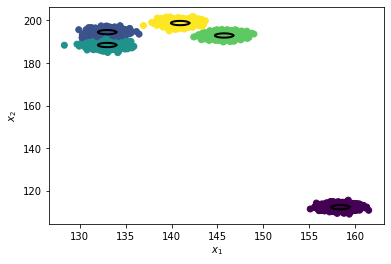

In [71]:
n_components      = 5                 # number of components to generate 
dim               = 2                 # dimension of dataset 
k                 = n_components      # composents of F function 
m                 = 3                 # composents of G function
n_samples         = 4000              # numbers of samples of data 
option            = 'random_weights'  # option probability of weights 
global_components =   2               # global components of data to generate 

sgmm = sampling_gaussian_mixture_model(n_components ,dim )

SGCMM = sgmm.fit(n_samples , edge =global_components)
X      = SGCMM.X
y = SGCMM.labels
sgmm.visualization_samling_data_GMM(plot_spherical_cluster = ' spherical cluster ')

In [72]:
edge =2
lst =100
pas = 100 
noise =10.
sgmm.plot_cluster_animation_parametre(edge ,lst , pas, noise)

interactive(children=(Dropdown(description='Method:', index=1, options=('random_weights', 'eqaul_weights'), va…

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

# Performance of Hierarchical Clustering Mixture Model 

# _____________________________________________________________________________

# Performance of HCMM for clusters data Get by GMM (approximation data)

Duration: 0:00:00.081686


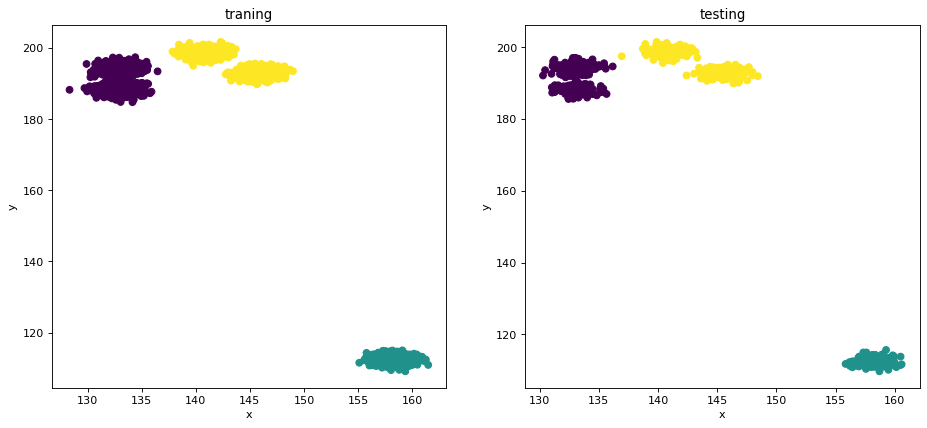

In [74]:
fig = plt.figure(figsize=(14, 6), dpi=80)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


start_time = datetime.now()

HCMM = Hierarchical_Mixture_Model(k,m)
hcmm = HCMM.fit(X_train)

labels_test= HCMM.predict(X_test)

labels_train= HCMM.predict(X_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))



ax1.scatter(X_train[:,0],X_train[:,1] , c = labels_train )
ax2.scatter(X_test[:,0],X_test[:,1] , c   = labels_test  )

ax1.set_title('traning')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.set_title('testing')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

# Parameters of G function

In [75]:
mean =hcmm.mean_G
mean

{0: array([132.97492891, 191.28686025]),
 1: array([158.39051825, 112.36786339]),
 2: array([143.30731443, 195.84960501])}

In [76]:
cov = hcmm.cov_G
cov

{0: array([[1.04917178e+00, 3.37423358e-03],
        [3.37423358e-03, 1.00515427e+01]]),
 1: array([[ 1.07304946, -0.05033001],
        [-0.05033001,  0.94485903]]),
 2: array([[ 6.74853983, -6.99300623],
        [-6.99300623,  9.63006685]])}

In [77]:
weights =hcmm.weights_G
weights

{0: 0.29399155089401574, 1: 0.38311672270837405, 2: 0.32289172639761005}

# Parameters of data


In [78]:
means = SGCMM.means
cov = np.asarray(SGCMM.cov)
weight= np.asarray(SGCMM.weights)

# Performance of HCMM for data from GMM law (real data)

Duration: 0:00:00.067759


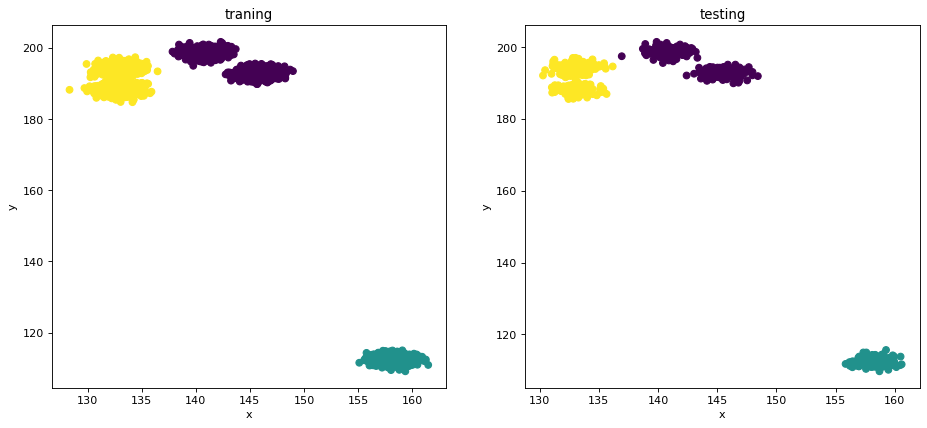

In [79]:
fig = plt.figure(figsize=(14, 6), dpi=80)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


start_time = datetime.now()

HCMM = Hierarchical_Mixture_Model(k,m , mean_F = means, cov_F= cov, weight_F= weight )
hcmm = HCMM.fit(X_train)

labels_test= HCMM.predict(X_test)

labels_train= HCMM.predict(X_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))



ax1.scatter(X_train[:,0],X_train[:,1] , c = labels_train )
ax2.scatter(X_test[:,0],X_test[:,1] , c   = labels_test  )

ax1.set_title('traning')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.set_title('testing')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()